In [1]:
import pandas as pd 
import numpy  as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("whitegrid")

## Import Data

In [2]:
data = pd.read_excel("dataset 1 (1).xlsx",skiprows=7)
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace( " " , "_")

## Head Data

In [3]:
data.head()

,order_date,customers_account_id,order_retail_type,payment_type,payment_num_installments,guide_shop_code,gross_revenue,number_of_items
0,2020-09-16,777078,Physical,CREDITO,4,GBAG,184.90,2
1,2020-09-12,553484,Online,BOLETO,1,AMHQ,249.80,2
2,2020-09-12,795418,Physical,CREDITO,2,GPAM,164.90,2
3,2020-09-11,810738,Physical,DEBITO,1,GMOR,162.54,4
4,2020-09-10,709088,Online,VISA CREDITO,4,AMHQ,395.73,3


In [146]:
data2019 = data[data['order_date'].dt.year == 2019]
data2020 = data[data['order_date'].dt.year == 2020]

## How much revenue the 1st quartile of customers were accountable for?

In [139]:
def aov(dataset):
    data_full = dataset
    
    df = dataset.\
         groupby(['customers_account_id']).\
         agg({"gross_revenue":"sum","order_date":"size"}).\
         reset_index().\
         rename(columns = { "gross_revenue":"revenue_by_customer" , "order_date":"number_of_orders_by_customer"})
    
    first_quantile = df['revenue_by_customer'].quantile(0.25)
    
    df = df[df['revenue_by_customer']<= first_quantile]
    
    responsable = df['revenue_by_customer'].sum()/data_full['gross_revenue'].sum()    
    aov = (df['revenue_by_customer'].sum())/(df['number_of_orders_by_customer'].sum())
    purchase_frequency = df['number_of_orders_by_customer'].sum()/df['customers_account_id'].nunique()
    
    return df['customers_account_id']
      
aov(data2019)

1     294528
4     513446
5     517194
9     539821
14    633529
17    663880
19    664481
20    666687
24    699645
31    748859
33    759021
48    810457
52    812287
55    836059
56    921934
Name: customers_account_id, dtype: int64

In [149]:
data19 = data2019[data2019['customers_account_id'].isin(aov(data2019))]
data19.sort_values(["customers_account_id",'order_date']).groupby("customers_account_id")['order_date'].diff(1)

909        NaT
842    67 days
833     8 days
822        NaT
493   189 days
404    41 days
655        NaT
407   142 days
370     8 days
447        NaT
Name: order_date, dtype: timedelta64[ns]

#  Purchase Frequency?

The purchase frequency is calculate as: NumberOfOrders/NumberOfCustomers

In [8]:
data2019 = data[data['order_date'].dt.year == 2019]

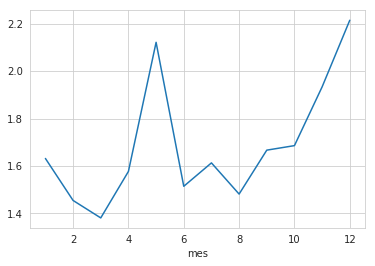

In [95]:
(data2019.groupby("mes")['customers_account_id'].size()/data2019.groupby("mes")['customers_account_id'].nunique()).plot()

In [84]:
data2019['customers_account_id'].size/data2019['customers_account_id'].nunique()

9.915254237288135

In [58]:
data2019['mes'] = data['order_date'].dt.month
data2019['ano'] = data['order_date'].dt.year
a1 = data2019.groupby(["mes","ano"])['customers_account_id'].agg({"customers_account_id":"nunique"}).reset_index().rename(columns = {"customers_account_id":"unique_customer"})
a2 = data2019.groupby(["mes",'ano'])['customers_account_id'].agg({"customers_account_id":"size"}).reset_index().rename(columns = {"customers_account_id":"freq_customer"})
a3 = a1.merge(a2[['freq_customer','mes']],on='mes')
a3['purch_freq'] = a3['freq_customer']/a3['unique_customer']

/home/viniciusota/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/viniciusota/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/viniciusota/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a f

In [59]:
data2020=data[data['order_date'].dt.year == 2020]
data2020['mes'] = data['order_date'].dt.month
data2020['ano'] = data['order_date'].dt.year
b1 = data2020.groupby(["mes","ano"])['customers_account_id'].agg({"customers_account_id":"nunique"}).reset_index().rename(columns = {"customers_account_id":"unique_customer"})
b2 = data2020.groupby(["mes",'ano'])['customers_account_id'].agg({"customers_account_id":"size"}).reset_index().rename(columns = {"customers_account_id":"freq_customer"})
b3 = b1.merge(b2[['freq_customer','mes']],on='mes')
b3['purch_freq'] = b3['freq_customer']/b3['unique_customer']

/home/viniciusota/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/viniciusota/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/viniciusota/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is depre

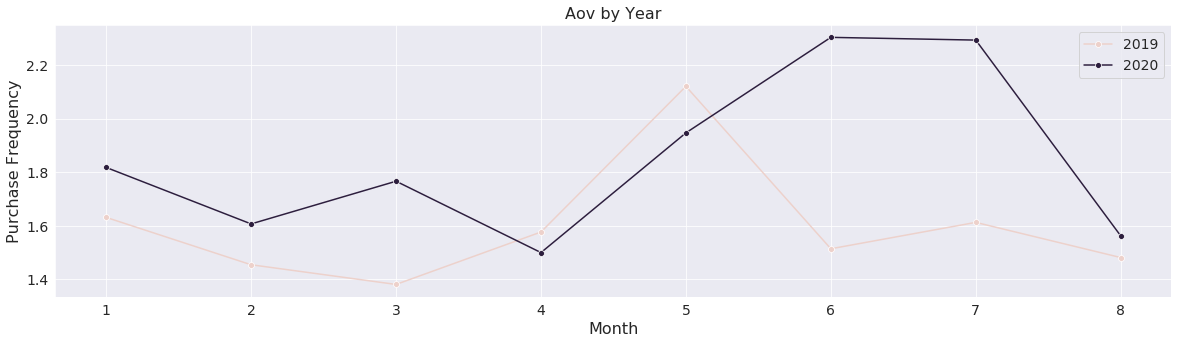

In [110]:
sns.set_style("darkgrid")
plt.figure(figsize = (20,5))
sns.lineplot(data = pd.concat([a3,b3],axis=0).query("mes < 9"), 
             x = 'mes',
             y = 'purch_freq',
             hue = 'ano',color='red',
             marker = 'o')
plt.title("Aov by Year",fontsize = 16)
plt.xlabel("Month",fontsize = 16)
plt.ylabel("Purchase Frequency",fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(labels = ["2019",'2020'],fontsize = 14) ; 

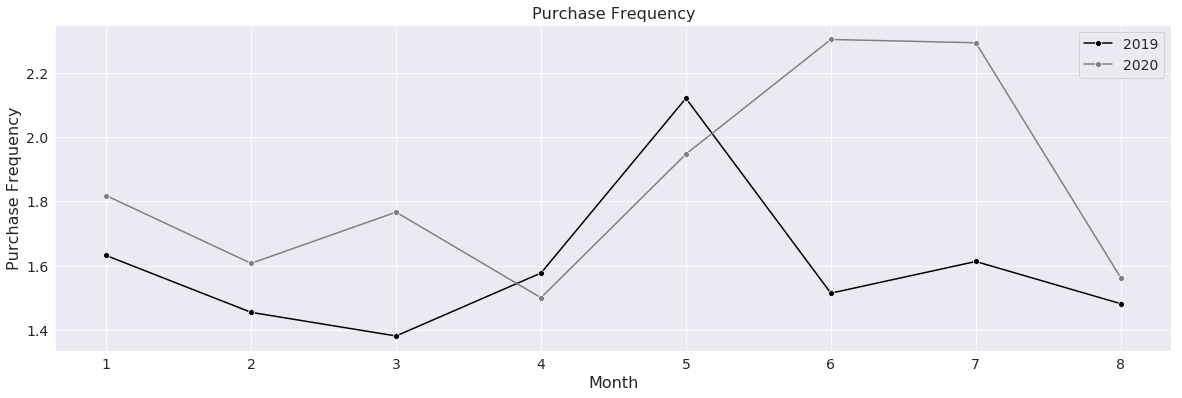

In [124]:
plt.figure(figsize = (20,6))
sns.lineplot(data = a3.query("mes < 9"),x = 'mes',y = 'purch_freq',color = 'black',marker = 'o')
sns.lineplot(data = b3.query("mes < 9") ,x = 'mes',y = 'purch_freq',color = 'gray',marker = 'o')
plt.title("Purchase Frequency",fontsize = 16)
plt.xlabel("Month",fontsize = 16)
plt.ylabel("Purchase Frequency",fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(labels = ["2019",'2020'],fontsize = 14) ; 

## Considering the time between purchases, for how long can we consider an active customer?

In [203]:
data_recencia = data.query("order_date < '2020-01-01'")[['customers_account_id','order_date']]
data_recencia = data_recencia.groupby("customers_account_id")['order_date'].max().to_frame().reset_index()
data_recencia['recencia'] = (pd.to_datetime('2020-01-01') - data_recencia['order_date']).dt.days

In [204]:
data_retorno = data.query("order_date >= '2020-01-01'")[['customers_account_id']]
data_retorno['retorno']  =  1

In [205]:
data_rr = data_recencia.merge(data_retorno,how='left').drop_duplicates()

In [207]:
data_rr['retorno'].fillna(0,inplace=True)

In [209]:
data_rr.groupby("recencia")['retorno'].mean()

recencia
2      1.000000
4      1.000000
5      1.000000
6      1.000000
8      1.000000
11     1.000000
13     1.000000
14     0.875000
20     1.000000
21     1.000000
23     1.000000
26     1.000000
27     0.800000
28     1.000000
35     1.000000
49     0.000000
55     1.000000
62     0.666667
90     1.000000
91     1.000000
104    0.000000
125    0.500000
126    0.000000
133    0.000000
179    1.000000
251    1.000000
259    1.000000
342    1.000000
378    1.000000
391    0.000000
Name: retorno, dtype: float64